In [1]:
!pip3 install opencv-python
!pip3 install imageio
!pip3 install scipy
!pip3 install scipy.signal
!pip3 install scikit-image

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement scipy.signal (from versions: none)
ERROR: No matching distribution found for scipy.signal

[notice] A new release of pip is ava

In [5]:
import os,sys
import numpy as np
import cv2
from imageio import imread
from PIL import Image
import scipy
from scipy.signal import convolve2d
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage import color
import matplotlib.pyplot as plt

In [7]:
#T3.1
def access():
    PathImg = "./images/"
    lstFilesImg = []
    for dirName, subdirList, fileList in os.walk(PathImg):
        for filename in fileList:
            lstFilesImg.append(os.path.join(dirName,filename))
        
    print("Lista de imagens: ")
    print(lstFilesImg)

    img=imread(lstFilesImg[0],pilmode='F')
    print("Dimensões 1ª imagem: ", img.shape)

    width=512
    height=512
    aspect_ratio = 1

    imglist=[]
    for file in lstFilesImg:
        img=imread(file,pilmode='F')
        img=np.array(Image.fromarray(img).resize((width,int(height* aspect_ratio))))
        imglist.append(img)
    Imagens = np.asarray(imglist,dtype=np.float32)
    print("Após resize: ", Imagens.shape)
    return Imagens

access()

Lista de imagens: 
['./images/8.0001.jpg', './images/pe_diabetico005.jpg', './images/ISIC_0013411.jpg', './images/histologica.jpg']
Dimensões 1ª imagem:  (881, 1081)


/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(lstFilesImg[0],pilmode='F')
/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(file,pilmode='F')


Após resize:  (4, 512, 512)


array([[[  7.692191 ,   7.0139527,   6.995338 , ...,   9.976585 ,
          10.178771 ,  11.386701 ],
        [  7.4167156,   6.963434 ,   7.000309 , ...,   9.948492 ,
          10.474797 ,  11.873413 ],
        [  7.433847 ,   6.9653506,   7.011054 , ...,   9.957497 ,
          10.465265 ,  11.897705 ],
        ...,
        [  5.       ,   5.024033 ,   4.824333 , ...,   8.815593 ,
          10.388629 ,  11.647157 ],
        [  4.9991865,   5.031586 ,   4.8293166, ...,   8.815593 ,
          10.362699 ,  11.983724 ],
        [  5.01227  ,   4.9101305,   4.749183 , ...,   8.815593 ,
          10.364171 ,  11.964614 ]],

       [[167.86122  , 167.34901  , 167.4934   , ..., 227.8992   ,
         229.36008  , 230.60713  ],
        [168.2269   , 168.86107  , 167.98193  , ..., 227.98161  ,
         229.42024  , 229.9986   ],
        [168.02408  , 169.08391  , 168.5878   , ..., 229.09442  ,
         230.68806  , 230.01608  ],
        ...,
        [174.52652  , 170.93974  , 166.9402   , ..., 1

Lista de imagens: 
['./images/8.0001.jpg', './images/pe_diabetico005.jpg', './images/ISIC_0013411.jpg', './images/histologica.jpg']
Dimensões 1ª imagem:  (881, 1081)


/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(lstFilesImg[0],pilmode='F')
/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(file,pilmode='F')


Após resize:  (4, 512, 512)


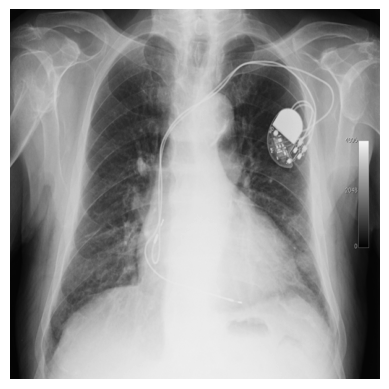

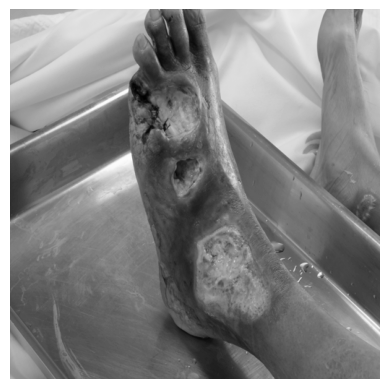

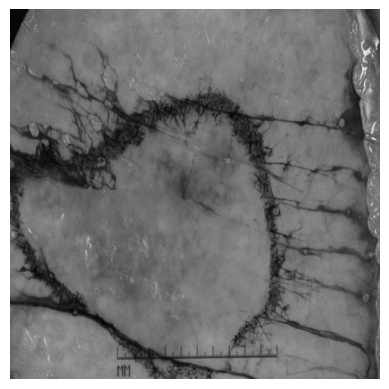

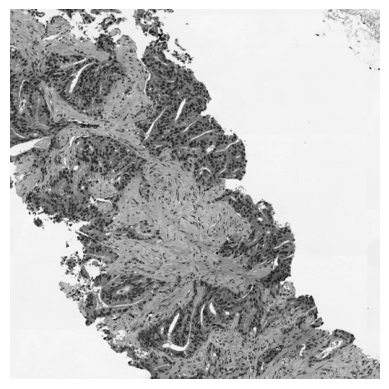

In [8]:
#T3.2
i = access()
def identity(Imagens, width, height):
    transform_matrix = np.array([
        [1,0,0],
        [0,1,0],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        #para gravar num ficheiro:
        plt.savefig(str(x) + '.png',bbox_inches='tight')
        plt.show()

identity(i, 512, 512)

Lista de imagens: 
['./images/8.0001.jpg', './images/pe_diabetico005.jpg', './images/ISIC_0013411.jpg', './images/histologica.jpg']
Dimensões 1ª imagem:  (881, 1081)


/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(lstFilesImg[0],pilmode='F')
/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(file,pilmode='F')


Após resize:  (4, 512, 512)


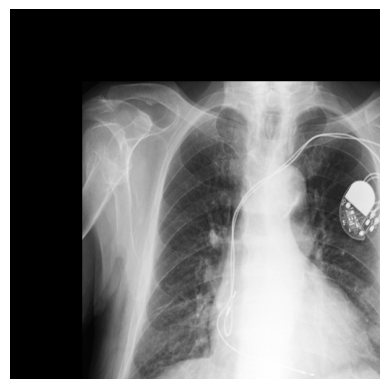

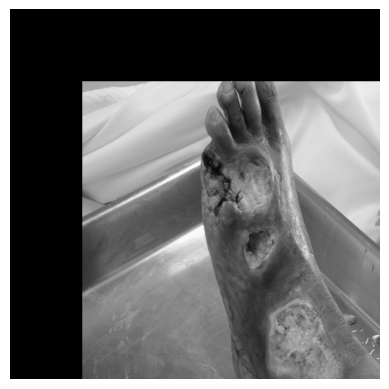

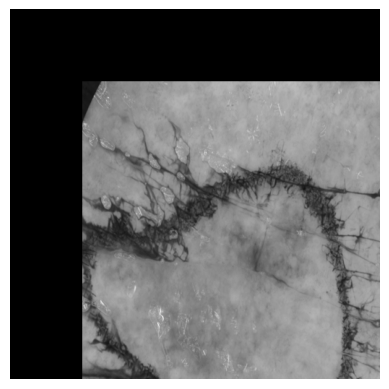

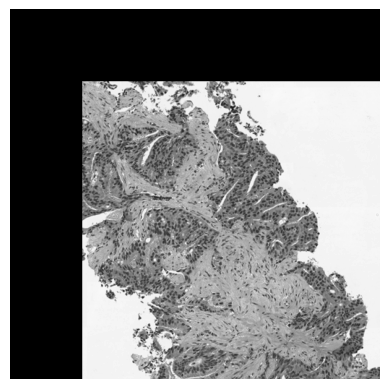

In [9]:
#T3.3
i = access()
def translation(Imagens, width, height):
    transform_matrix = np.array([
        [1,0,100],
        [0,1,100],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

translation(i, 512, 512)


Lista de imagens: 
['./images/8.0001.jpg', './images/pe_diabetico005.jpg', './images/ISIC_0013411.jpg', './images/histologica.jpg']
Dimensões 1ª imagem:  (881, 1081)


/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(lstFilesImg[0],pilmode='F')
/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(file,pilmode='F')


Após resize:  (4, 512, 512)


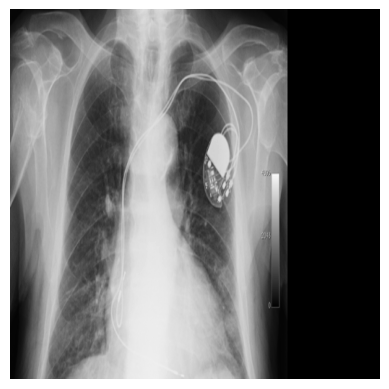

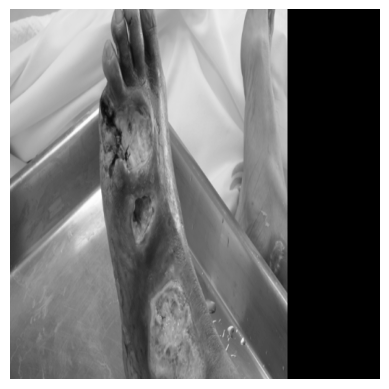

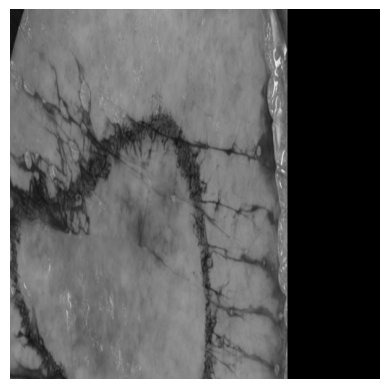

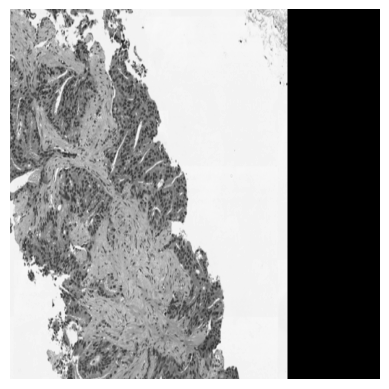

In [10]:
#T3.4
img = access()
def scaling(Imagens, width, height):
    transform_matrix = np.array([
        [0.75,0,0],
        [0,1.25,0],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

scaling(img, 512, 512)

Lista de imagens: 
['./images/8.0001.jpg', './images/pe_diabetico005.jpg', './images/ISIC_0013411.jpg', './images/histologica.jpg']
Dimensões 1ª imagem:  (881, 1081)


/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(lstFilesImg[0],pilmode='F')
/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(file,pilmode='F')


Após resize:  (4, 512, 512)


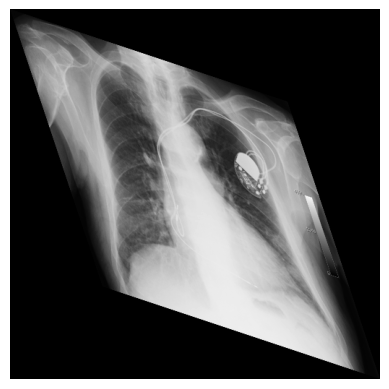

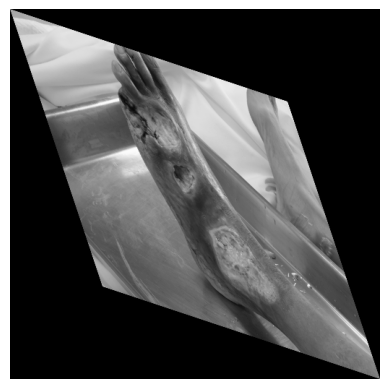

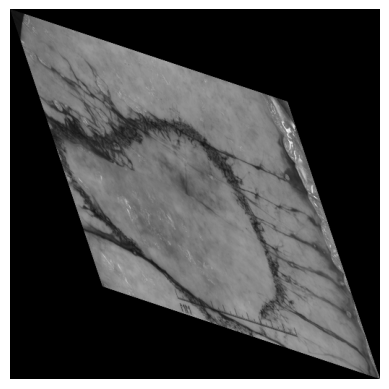

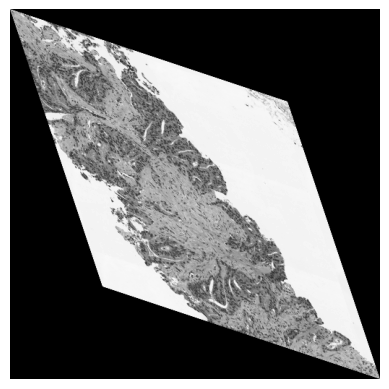

In [11]:
#T3.5
i = access()
def shearing(Imagens, width, height):
    transform_matrix = np.array([
        [0.75,0.25,0],
        [0.25,0.75,0],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

shearing(i, 512, 512)

Lista de imagens: 
['./images/8.0001.jpg', './images/pe_diabetico005.jpg', './images/ISIC_0013411.jpg', './images/histologica.jpg']
Dimensões 1ª imagem:  (881, 1081)


/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(lstFilesImg[0],pilmode='F')
/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(file,pilmode='F')


Após resize:  (4, 512, 512)


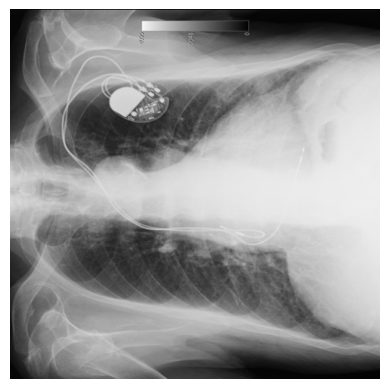

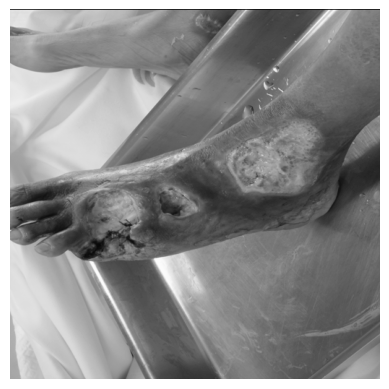

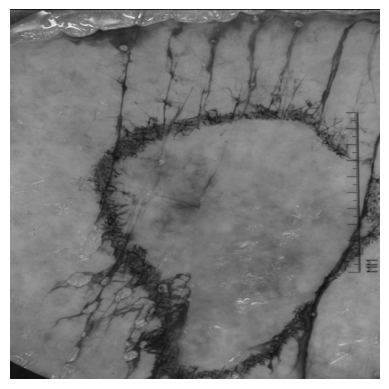

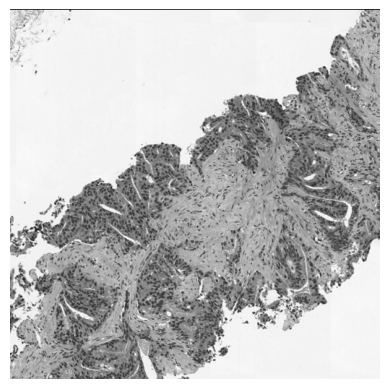

In [12]:
#T3.6
i = access()
def rotation(Imagens, width, height):
    transform_matrix = np.array([
        [np.cos(np.pi/2),np.sin(np.pi/2), (1-np.cos(np.pi/2))*256-np.sin(np.pi/2)*256 ],
        [-np.sin(np.pi/2),np.cos(np.pi/2),np.sin(np.pi/2)*256+(1-np.cos(np.pi/2))*256 ],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

rotation(i, 512, 512)

Lista de imagens: 
['./images/8.0001.jpg', './images/pe_diabetico005.jpg', './images/ISIC_0013411.jpg', './images/histologica.jpg']
Dimensões 1ª imagem:  (881, 1081)


/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(lstFilesImg[0],pilmode='F')
/var/folders/66/k9vw546x645cqg5sxxpvb9rw0000gn/T/ipykernel_1491/3190525124.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread(file,pilmode='F')


Após resize:  (4, 512, 512)


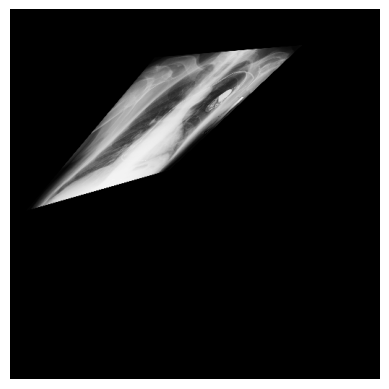

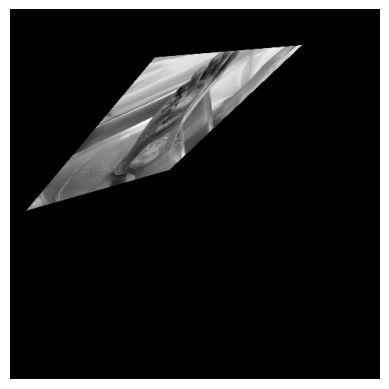

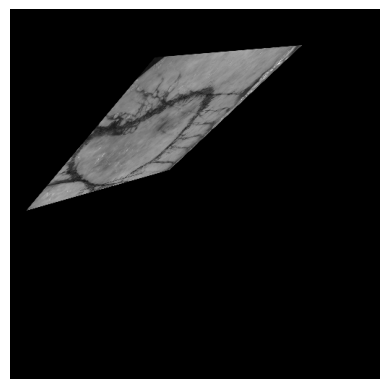

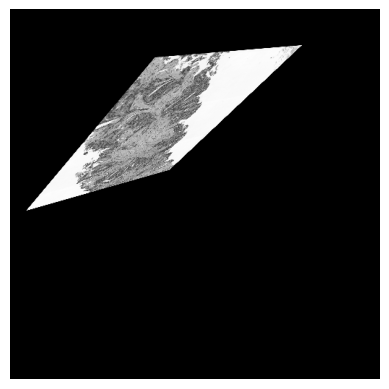

In [13]:
#T3.7
i = access()
def homogeneous(Imagens, width, height):
    transform_matrix = np.array([
        [1,-1/2,300 ],
        [0,0.9,100],
        [0.001,0.001,1.5],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpPerspective(Imagens[x,:,:],transform_matrix,(512,512))
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

homogeneous(i, 512, 512)